## Kütüphaneler

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Dosya Okuma İşlemi

Dosyaların içeriğini okumak için `read_csv` fonksiyonunu kullandık. 

`read_csv` fonksiyonunun kullanılan özellikleri:
* `filepath_or_buffer` : okunulacak olan dosyanın path'ini gireceğiniz kısımdır.
* `header` : hangi satırların başlık olarak kabul edilip edilemeyeceğini belirler.
  * None : Metin dosyasının ilk satırı sütun başlıklarının bir listesi olarak kullanılmaz.
  * Bir sayı : Metin dosyasının ilk satırı sütun başlıklarının bir listesi olarak kullanılır. Bu durumda, header parametresine verilen sayı, sütun başlıklarının ilk satırda başlayacağı satır numarasını belirtir.
  * Bir liste : Metin dosyasının ilk satırı sütun başlıklarının bir listesi olarak kullanılır. Bu durumda, header parametresine verilen liste, sütun başlıklarını belirtir.

In [277]:
df = pd.read_csv(filepath_or_buffer="wine-clustering.csv", header=0)	# CSV dosyasını okuyun
print(df.head())														# Verilerin ilk birkaç satırını görüntüleyin


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [278]:
print(df.describe())		# Verilerin temel istatistiklerini görüntüleyin
print(df.isnull().sum())	# Eksik verileri kontrol edin

df = df.fillna(df.mean())	# Eksik verileri ortalama ile doldurun (varsa)


          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

##  Verileri Normalleştirme ve Ölçeklendirme

In [279]:
scaler = StandardScaler()											# StandardScaler kullanarak verileri ölçeklendireceğiz
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])		# Veri çerçevemizdeki son sütunu (etiketler dahil değil) alır ve bu sütunları ölçeklendirir


## Kategorik Verileri Dönüştürme

In [280]:
label_encoder = LabelEncoder()												# LabelEncoder kullanarak kategorik verileri dönüştüreceğiz
categorical_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
					   'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
					   'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

for column in categorical_columns:
	df[column] = label_encoder.fit_transform(df[column])					# Kategorik sütunlar üzerinde döngü yaparak bu sütunları sayısal değerlere dönüştürüyoruz


## Korelasyon Matrisi ve Isı Haritası

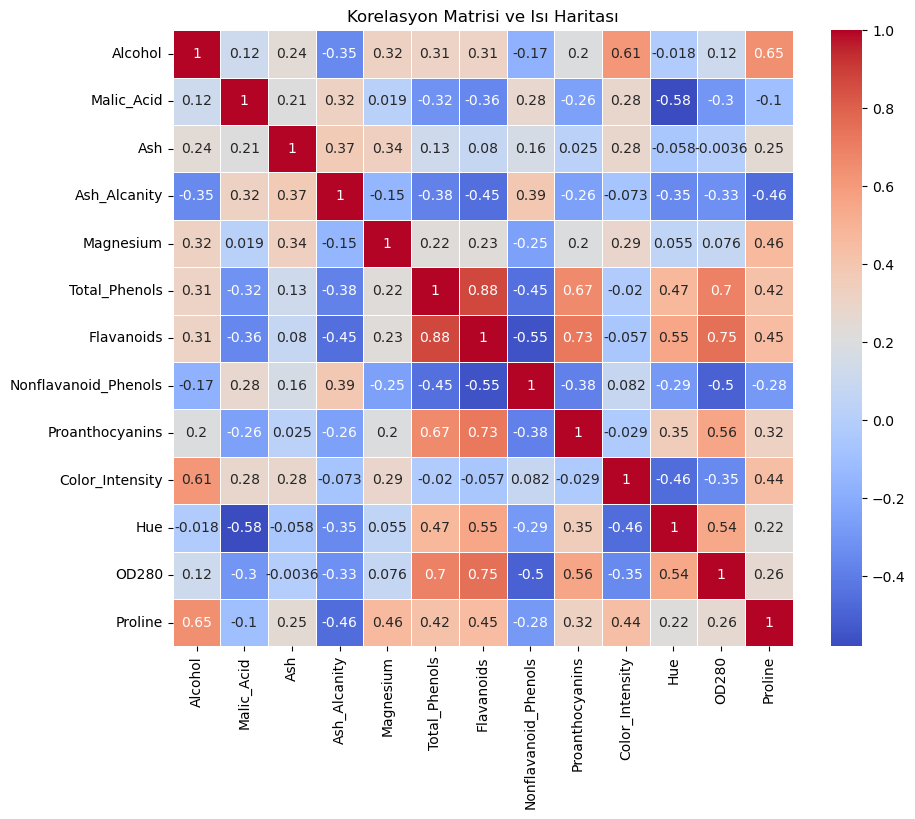

In [281]:
correlation_matrix = df.corr()  												# Verilerin korelasyon matrisini hesaplayın
plt.figure(figsize=(10, 8))  													# Grafik boyutunu belirleyin

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)	# Isı haritasını çizin
# Bu harita, verilerin hangi özelliklerinin birbiriyle ne kadar ilişkili olduğunu gösterir

plt.title("Korelasyon Matrisi ve Isı Haritası")									# Grafik başlığını belirleyin
plt.show()																		# Grafiği gösterin


## Kare Hata Değerleri

In [282]:
inertia_values = []												# Toplam kare hata (inertia) değerlerini saklayacak bir liste oluşturun

for k in range(1, 11):											# Kümeler arasındaki farklı sayılarda deneyin
	kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
	kmeans.fit(df)
	inertia_values.append(kmeans.inertia_)						# Her küme sayısı için toplam kare hata değerini hesaplayın ve listeye ekleyin


## Dirsek Metodu Grafiği

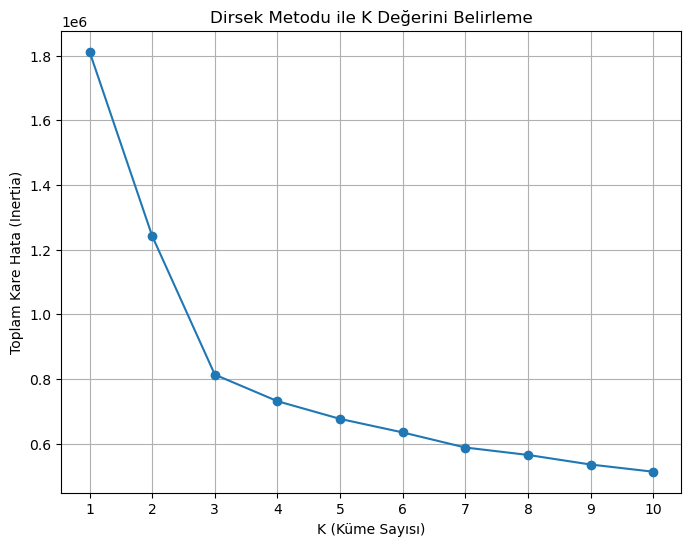

In [283]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.xlabel('K (Küme Sayısı)')
plt.ylabel('Toplam Kare Hata (Inertia)')
plt.title('Dirsek Metodu ile K Değerini Belirleme')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## K Değeri ile Küme Merkezlerini ve Etiketleri Alma

In [284]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
kmeans.fit(df)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


## Küme Merkezleri ve Etiketleri İnceleme

In [285]:
print("Küme Merkezleri:")
print(cluster_centers)
print("Veri Noktalarının Küme Etiketleri:")
print(labels)


Küme Merkezleri:
[[ 64.49019608  91.68627451  42.37254902  43.45098039  19.41176471
   23.15686275  19.          24.7254902   26.29411765  94.60784314
   15.19607843  18.37254902  48.54901961]
 [ 26.47619048  45.23809524  29.57142857  38.          14.44444444
   46.53968254  60.57142857  17.9047619   51.25396825  22.84126984
   48.9047619   66.6984127   33.17460317]
 [ 89.765625    51.8125      44.703125    24.109375    26.15625
   73.9375     101.953125    11.84375     67.734375    74.0625
   51.265625    85.984375    91.28125   ]]
Veri Noktalarının Küme Etiketleri:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 2 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Toplam Kare Hata Değerini İnceleme

In [286]:
inertia = kmeans.inertia_
print("Toplam Kare Hata (Inertia) Değeri:", inertia)


Toplam Kare Hata (Inertia) Değeri: 813138.57777486


## PCA ile Verileri İki Boyuta İndirgeme

PCA (Principal Component Analysis), çok boyutlu veri setlerindeki değişkenlik ve ilişkileri anlamak, boyut azaltma yapmak ve veriyi daha anlaşılır ve işlenebilir hale getirmek için kullanılan bir veri madenciliği ve boyut azaltma tekniğidir.

Aşağıda yer alan ilk iki satırdaki kod, veriyi iki boyuta indirgeyen ve bu işlem sırasında birinci ve ikinci temel bileşenleri hesaplayan kod satırlarıdır.

Birinci ve ikinci temel bileşenlerin özellikleri şunlardır:

* Birinci Temel Bileşen (First Principal Component): Veri setindeki en büyük varyansı temsil eder. Bu bileşen, verinin en önemli yönünü belirler ve genellikle verinin çoğunu açıklar. Veri setinin varyansını maksimize etmek için hesaplanır.
* İkinci Temel Bileşen (Second Principal Component): Birinci temel bileşenin yönüne dik olan en büyük varyansı temsil eder. İkinci temel bileşen, birinci temel bileşeni düşürdükten sonra geriye kalan varyansı açıklar. Birinci temel bileşenle ortogonaldir, yani birinci ve ikinci temel bileşenler birbirine dik açılar oluşturur.


In [289]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

labels = kmeans.labels_										# Veri noktalarının hangi kümeye ait olduğunu alın
cluster_centers = pca.transform(kmeans.cluster_centers_)	# Küme merkezlerini alın


/Users/nisacerenunnu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## Veri Görselleştirme

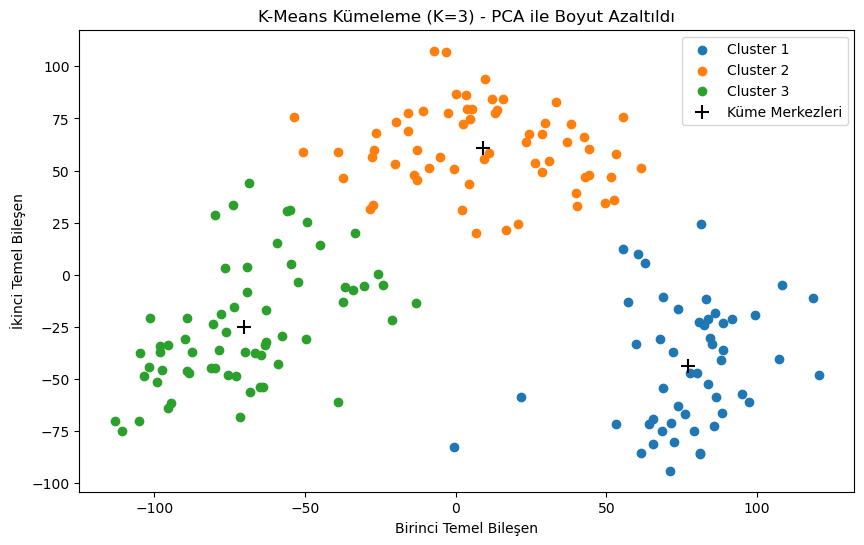

In [290]:
plt.figure(figsize=(10, 6))

# Her küme için farklı renkler kullanarak veri noktalarını çizin
for i in range(K):
    plt.scatter(df_pca[labels == i, 0], df_pca[labels == i, 1], label=f'Cluster {i + 1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='+', s=100, label='Küme Merkezleri')		# Küme merkezlerini çizin

plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.title(f'K-Means Kümeleme (K={K}) - PCA ile Boyut Azaltıldı')
plt.legend()
plt.show()
